## Unsupervised learning: Oja's rule

In the first part of this exercise we will reproduce the Figures in Chapter 39 of the MacKay book.

$x$ is an $p \times N$ matrix containing all the N-dimensional input vectors for each of the p patterns. We pick $N=2$ and set x[0]=-1, so that w[0] is the threshold, and w[1] and w[2] are the weights.

$t$ is a vector of length p containing the targets for each training pattern, each target $\in$ {0,1}

We can choose two options: linearly separable patterns, or nonseparable patterns

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(1)

## Generate training set

Phi 0.7853981633974483


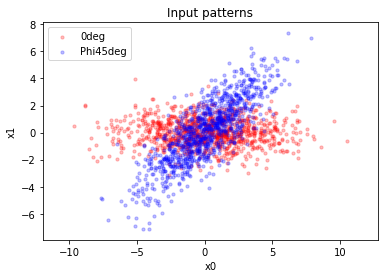

In [ ]:
# multivariate gaussian patterns
p=1000 # number of patterns
mean0=[0,0] # center
cov0=[[10,0],[0,1]]
x0fromcov0,x1fromcov0=np.random.multivariate_normal(mean0,cov0,[p]).T # before rotation
xinit=np.array([x0fromcov0,x1fromcov0]).T # rows=observations, cols=dimensions

angle=45 # counterclockwise rotation
Phi=angle*np.pi/180
print('Phi %s' % Phi)
c,s=np.cos(Phi),np.sin(Phi)
R=np.array(((c,-s),(s,c))) # rotation matrix
x=np.dot(R,xinit.T).T # rotated datapoints

size=10
fig,ax=plt.subplots()
ax.scatter(xinit[:,0],xinit[:,1],s=size,color='red',alpha=0.25,label='0deg')
ax.scatter(x[:,0],x[:,1],s=size,color='blue',alpha=0.25,label='Phi{:}deg'.format(angle))
ax.set_xlabel('x0'); ax.set_ylabel('x1'); ax.set_title('Input patterns');
ax.axis('equal')
ax.legend()

## Principal Component Analysis

In [ ]:
def cov(data):
    # for mean centered data
    return np.dot(data.T,data)/data.shape[0]

def pca(data,pc_count=None):
    data1=data
    data1=data1-np.mean(data1,0)
    C=cov(data1)
    E,V=np.linalg.eigh(C)
    key=np.argsort(E)[::-1][:pc_count]
    E,V=E[key],V[:,key]
    score=np.dot(data1,V) 
    return score,E,V

score,E,V=pca(x)
print('PCs (column vectors in V):'); print(V)
print('PC eigenvalues:'); print(E)
print('percentage of variance explained:'); print(100*E/sum(E))
if (V[0,0]<0) & (V[1,0]<0):
    V[:,0]=-V[:,0] # set PC1 it in the 1st quadrant
    score[:,0]=-score[:,0]
    
fig,ax=plt.subplots(1,3,figsize=(15,5))

# plot PCA eigenvectors
ax[0].scatter(x[:,0],x[:,1],s=size,color='blue',alpha=0.25,label='Phi{:}deg'.format(angle))
ax[0].scatter(x[-1,0],x[-1,1],s=100,color='m',marker='x',label='X')
ax[0].plot([0,np.sqrt(E[0])*V[0,0]],[0,np.sqrt(E[0])*V[1,0]],color='red',linewidth=3,label='PCA1*SD1')
ax[0].plot([0,np.sqrt(E[1])*V[0,1]],[0,np.sqrt(E[1])*V[1,1]],color='green',linewidth=3,label='PCA2*SD2')
ax[0].set_xlabel('x0'); ax[0].set_ylabel('x1'); ax[0].set_title('PCA');
ax[0].axis('equal')
ax[0].legend()

# distribution of eigenvalues
percE=100*E/sum(E)
indPC=np.arange(len(percE))+1
ax[1].scatter(indPC,percE,c='r')
ax[1].set_xlabel('PC #'); ax[1].set_ylabel('var. explained [%]'); ax[1].set_title('PC eig distribution');

# dimensionality reduction on PC1
ax[2].scatter(score[:,0],np.zeros((p,1)),s=10,color='blue',alpha=0.25)
ax[2].scatter(score[-1,0],0,s=100,color='m',marker='x',label='X')
ax[2].set_xlabel('PC1'); ax[2].set_ylabel(''); ax[2].set_title('dimensionality reduction');


NameError: ignored

## Activity rule 
Activity: 
$$
{\cal O}=f(h)=\sum_{i=1}^N w_i x_i
$$

## Online training using Oja's learning rule
$$
\Delta w_i=\eta {\cal O}\left(x_i^\mu-\alpha {\cal O} w_i\right)
$$

initial weights [ 6.123234e-17 -1.000000e+00]


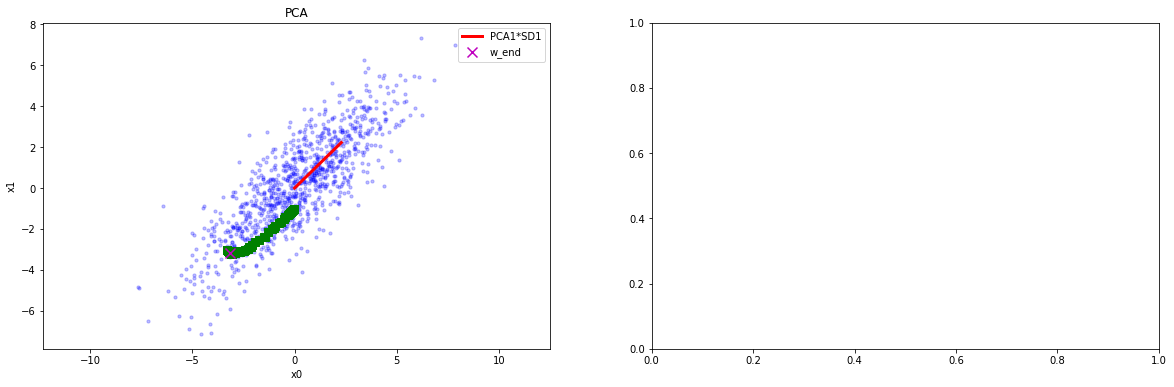

In [ ]:
Tfold=1 # number of repeats over the whole batch
stepPlot=10 # snapshot

eta=0.001 # learning rate
alpha=0.05 # weight decay

# initial weights
initial_angle=-90 # initial angle of weight vector (deg)
radangle=initial_angle*np.pi/180
w=np.array([np.cos(radangle),np.sin(radangle)])
print('initial weights %s' % w)

wplot=[]
for ifold in range(Tfold):
    for i in range(0,p):
        y=np.dot(w,x[i,:]) # activation and the output (linear activity)
        w=w+eta*y*(x[i,:]-alpha*y*w)
        if (i % stepPlot==0):
            wplot.append(w)
            
# plot training        
wplot=np.array(wplot)
fig,ax=plt.subplots(1,1,figsize=(20,6))
# learning steps
xplot=stepPlot*(np.arange(len(wplot)))
ax[0].scatter(x[:,0],x[:,1],s=size,color='blue',alpha=0.25)#,label='Phi{:}deg'.format(angle))
# ax[0].scatter(x[-1,0],x[-1,1],s=100,color='m',marker='x',label='X')
ax[0].plot([0,np.sqrt(E[0])*V[0,0]],[0,np.sqrt(E[0])*V[1,0]],color='red',linewidth=3,label='PCA1*SD1')
# ax[0].plot([0,np.sqrt(E[1])*V[0,1]],[0,np.sqrt(E[1])*V[1,1]],color='green',linewidth=3,label='PCA2*SD2')
ax[0].scatter(wplot[:,0],wplot[:,1],s=50,marker='s',c='g')
ax[0].scatter(wplot[-1,0],wplot[-1,1],s=100,color='m',marker='x',label='w_end')



ax[0].set_xlabel('x0'); ax[0].set_ylabel('x1'); ax[0].set_title('PCA');
ax[0].axis('equal')
ax[0].legend()


### Optional assignments: (20 extra points)

Question 1: Train the network using p=10.000 circular data points generated with covariance matrix C=[[1,0],[0,1]]. Train the network several times starting from different random initial conditions for the weights. What happens to the weights? Train the network for a longer time: what do the weights converge to? Propose an explanation for what you found.

Question 2: Train the network using p=1000 data points generated with covariance matrix C=[[10,0],[0,1]] and mean mu=[10,10]. What happens to the weights? Do the weights still represent the 1st PC, or something else? Why?

Question 3: Train the network using the unsupervised learning rule derived in the previous assignment:
$$
\Delta w_i=\eta[(Cw)_i-\alpha w_i(w^Tw)]
$$
What is the difference between the weights obtained from Oja's rule and the weights obtained from this new rule?

# Question 1 Solution

In [ ]:
def cov(data):
    # for mean centered data
    return np.dot(data.T,data)/data.shape[0]

def pca(data,pc_count=None, centered=True):
    data1=data
    if centered:
      data1=data1-np.mean(data1,0)
    C=cov(data1)
    E,V=np.linalg.eigh(C)
    key=np.argsort(E)[::-1][:pc_count]
    E,V=E[key],V[:,key]
    score=np.dot(data1,V) 
    return E,V

def generatepatterns(p,cov0=[[1,0],[0,1]],angle=45,mean0 =[0,0],Display=False):
  # multivariate gaussian patterns
  #p=1000 # number of patterns
 # mean0=[0,0] # center
  #cov0=[[10,0],[0,1]]
  x0fromcov0,x1fromcov0=np.random.multivariate_normal(mean0,cov0,[p]).T # before rotation
  xinit=np.array([x0fromcov0,x1fromcov0]).T # rows=observations, cols=dimensions

  #angle=45 # counterclockwise rotation
  Phi=angle*np.pi/180
  print('Phi %s' % Phi)
  c,s=np.cos(Phi),np.sin(Phi)
  R=np.array(((c,-s),(s,c))) # rotation matrix
  x=np.dot(R,xinit.T).T # rotated datapoints

  if Display:
    size=10
    fig,ax=plt.subplots()
    ax.scatter(xinit[:,0],xinit[:,1],s=size,color='red',alpha=0.25,label='0deg')
    ax.scatter(x[:,0],x[:,1],s=size,color='blue',alpha=0.25,label='Phi{:}deg'.format(angle))
    ax.set_xlabel('x0'); ax.set_ylabel('x1'); ax.set_title('Input patterns');
    ax.axis('equal')
    ax.legend()
  return x

def training(trainingset,stepPlot=10,Tfold=100,eta=0.001,alpha=0.05,initial_angle=-90,mean=[0,0],Display=False):
  #Tfold=1 # number of repeats over the whole batch
  #stepPlot=10 # snapshot

  #eta=0.001 # learning rate
  #alpha=0.05 # weight decay

  # initial weights
  #initial_angle=-90 # initial angle of weight vector (deg)
  radangle=initial_angle*np.pi/180
  w=np.array([np.cos(radangle),np.sin(radangle)])+np.array(mean)
  

  wplot=[]
  for ifold in range(Tfold):
      for i in range(trainingset.shape[0]):
          y=np.dot(w,trainingset[i,:]) # activation and the output (linear activity)
          w=w+eta*y*(trainingset[i,:]-alpha*y*w)
          if (i % stepPlot==0):
              wplot.append(w)
  wplot=np.array(wplot)            
  if Display:

    # plot training
    print('initial weights %s' % w)        
    #wplot=np.array(wplot)
    fig,ax=plt.subplots(1,1,figsize=(20,6))
    # learning steps
    xplot=stepPlot*(np.arange(len(wplot)))
    ax[0].scatter(x[:,0],x[:,1],s=size,color='blue',alpha=0.25)#,label='Phi{:}deg'.format(angle))
    # ax[0].scatter(x[-1,0],x[-1,1],s=100,color='m',marker='x',label='X')
    ax[0].plot([0,np.sqrt(E[0])*V[0,0]],[0,np.sqrt(E[0])*V[1,0]],color='red',linewidth=3,label='PCA1*SD1')
    # ax[0].plot([0,np.sqrt(E[1])*V[0,1]],[0,np.sqrt(E[1])*V[1,1]],color='green',linewidth=3,label='PCA2*SD2')
    ax[0].scatter(wplot[:,0],wplot[:,1],s=50,marker='s',c='g')
    ax[0].scatter(wplot[-1,0],wplot[-1,1],s=100,color='m',marker='x',label='w_end')



    ax[0].set_xlabel('x0'); ax[0].set_ylabel('x1'); ax[0].set_title('Training, 10000 Circular Data points, Varying Initial Angles');
    ax[0].axis('equal')
    ax[0].legend()
  
  return w,wplot



Phi 0.0


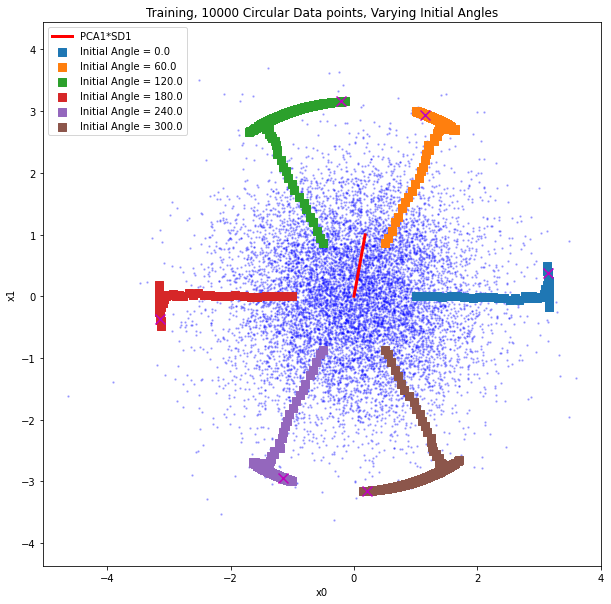

In [ ]:
p=10000
trainingset=generatepatterns(p,angle=0)
size=2
E,V = pca(trainingset)
N=6
epochs=8
stepPlot=100
eta=0.001
alpha=0.1

angles=[]
for i in range(N):
  angles.append(i*360/N)

fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(trainingset[:,0],trainingset[:,1],s=size,color='blue',alpha=0.25)#,label='Phi{:}deg'.format(angle))
ax.plot([0,np.sqrt(E[0])*V[0,0]],[0,np.sqrt(E[0])*V[1,0]],color='red',linewidth=3,label='PCA1*SD1')
for angle in angles:
  w,wplot = training(trainingset,stepPlot=stepPlot,Tfold=epochs,eta=eta,alpha=alpha,initial_angle=angle)
  ax.scatter(wplot[:,0],wplot[:,1],s=50,marker='s', label=('Initial Angle = {}'.format(angle)))
  ax.scatter(wplot[-1,0],wplot[-1,1],s=100,color='m',marker='x')

ax.set_xlabel('x0'); ax.set_ylabel('x1'); ax.set_title('Training, 10000 Circular Data points, Varying Initial Angles');
ax.axis('equal')
ax.legend()






When we initialize the weight at a certain angle, it keeps training in that direction until it gets sufficiently far from the mean of the trainingset, then it seems to train towards the 1st principal component if the initial weight paired positively with it, and minus the 1st principal component if the initial weight paired negatively with it. 

Explanation: Since the training set is circular, the difference in magnitude between the first and second principal components is minute. When the magnitude of the weight is small, we can barely notice the difference in the training direction. When the magnitude of the weight is very large, the preference for the 1st principal component over the second becomes much more pronounced.

#Question 2 Solution

Phi 0.0


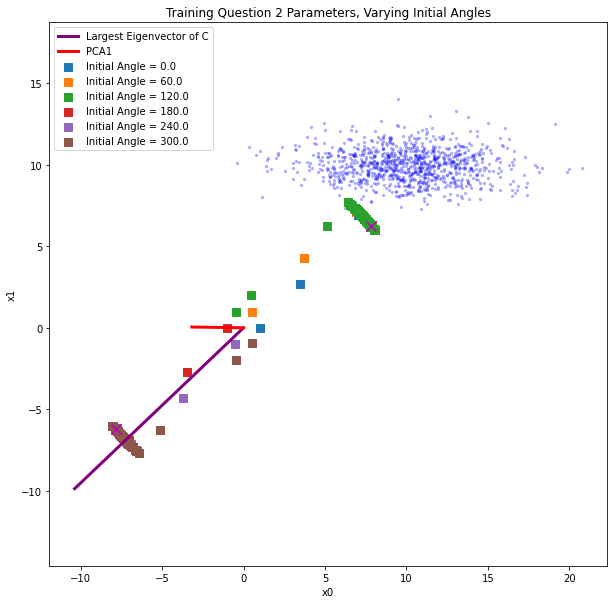

In [ ]:
p=1000
mu=[10,10]
C=[[10,0],[0,1]]
trainingset=generatepatterns(p,cov0=C,angle=0,mean0=mu)
size=5
E,V = pca(trainingset,centered = False)
E1,V1 = pca(trainingset)
N=6
epochs=10
stepPlot=10
eta=0.001
alpha=0.01

angles=[]
for i in range(N):
  angles.append(i*360/N)

fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(trainingset[:,0],trainingset[:,1],s=size,color='blue',alpha=0.25)#,label='Phi{:}deg'.format(angle))
ax.plot([0,np.sqrt(E[0])*V[0,0]],[0,np.sqrt(E[0])*V[1,0]],color='purple',linewidth=3,label='Largest Eigenvector of C')
ax.plot([0,np.sqrt(E1[0])*V1[0,0]],[0,np.sqrt(E1[0])*V1[1,0]],color='red',linewidth=3,label='PCA1')
for angle in angles:
  w,wplot = training(trainingset,stepPlot=stepPlot,Tfold=epochs,eta=eta,alpha=alpha,initial_angle=angle)
  ax.scatter(wplot[:,0],wplot[:,1],s=50,marker='s', label=('Initial Angle = {}'.format(angle)))
  ax.scatter(wplot[-1,0],wplot[-1,1],s=100,color='m',marker='x')

ax.set_xlabel('x0'); ax.set_ylabel('x1'); ax.set_title('Training Question 2 Parameters, Varying Initial Angles');
ax.axis('equal')
ax.legend()


When the data is not centered at 0, the model still trains towards the largest eigenvector of the matrix C. When the data is not centered, the matrix C cannot be interpreted as the covariance matrix of the data, so its largest eigenvalue cannot be interepreted as the 1st principal component

# Question 3 Solution

In [ ]:
def training2(trainingset,stepPlot=10,Tfold=100,eta=0.001,alpha=0.05,initial_angle=-90,Display=False):
  #Tfold=1 # number of repeats over the whole batch
  #stepPlot=10 # snapshot

  #eta=0.001 # learning rate
  #alpha=0.05 # weight decay

  # initial weights
  #initial_angle=-90 # initial angle of weight vector (deg)
  radangle=initial_angle*np.pi/180
  w=8*np.array([np.cos(radangle),np.sin(radangle)])
  C=cov(trainingset)

  wplot=[]
  wplot.append(w)
  for i in range(Tfold):
    w+=eta*(C.dot(w)-alpha*(w.dot(w))*w)
    wplot.append(w)
  wplot=np.array(wplot)            
  if Display:

    # plot training
    print('initial weights %s' % w)        
    #wplot=np.array(wplot)
    fig,ax=plt.subplots(1,1,figsize=(20,6))
    # learning steps
    xplot=stepPlot*(np.arange(len(wplot)))
    ax[0].scatter(x[:,0],x[:,1],s=size,color='blue',alpha=0.25)#,label='Phi{:}deg'.format(angle))
    # ax[0].scatter(x[-1,0],x[-1,1],s=100,color='m',marker='x',label='X')
    ax[0].plot([0,np.sqrt(E[0])*V[0,0]],[0,np.sqrt(E[0])*V[1,0]],color='red',linewidth=3,label='PCA1*SD1')
    # ax[0].plot([0,np.sqrt(E[1])*V[0,1]],[0,np.sqrt(E[1])*V[1,1]],color='green',linewidth=3,label='PCA2*SD2')
    ax[0].scatter(wplot[:,0],wplot[:,1],s=50,marker='s',c='g')
    ax[0].scatter(wplot[-1,0],wplot[-1,1],s=100,color='m',marker='x',label='w_end')



    ax[0].set_xlabel('x0'); ax[0].set_ylabel('x1'); ax[0].set_title('Training, 10000 Circular Data points, Varying Initial Angles');
    ax[0].axis('equal')
    ax[0].legend()
  
  return wplot

Phi 0.0


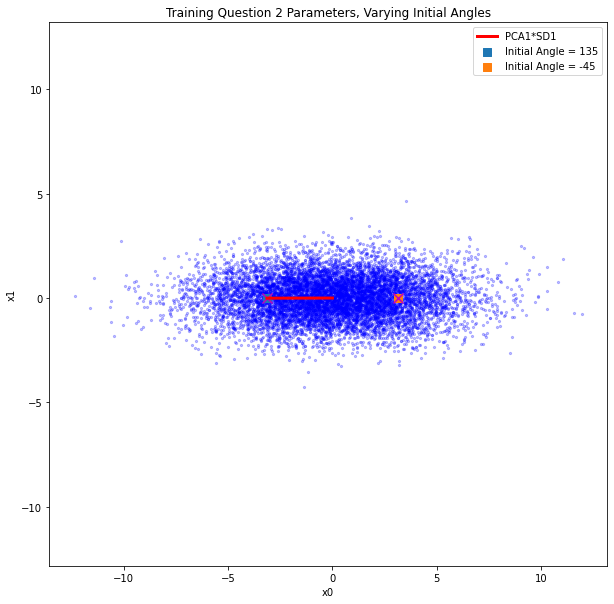

In [ ]:
p=10000
mu=[0,0]
C=[[10,0],[0,1]]
trainingset=generatepatterns(p,cov0=C,angle=0,mean0=mu)
size=5
E,V = pca(trainingset)
N=4
epochs=1000
stepPlot=1
eta=0.01
alpha=1

angles=[135,-45]
#for i in range(N):
  #angles.append(i*360/N)

fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(trainingset[:,0],trainingset[:,1],s=size,color='blue',alpha=0.25)#,label='Phi{:}deg'.format(angle))
ax.plot([0,np.sqrt(E[0])*V[0,0]],[0,np.sqrt(E[0])*V[1,0]],color='red',linewidth=3,label='PCA1*SD1')
for angle in angles:
  wplot = training2(trainingset,stepPlot=stepPlot,Tfold=epochs,eta=eta,alpha=alpha,initial_angle=angle)
  ax.scatter(wplot[:,0],wplot[:,1],s=50,marker='s', label=('Initial Angle = {}'.format(angle)))
  ax.scatter(wplot[-1,0],wplot[-1,1],s=100,color='m',marker='x')

ax.set_xlabel('x0'); ax.set_ylabel('x1'); ax.set_title('Training Question 2 Parameters, Varying Initial Angles');
ax.axis('equal')
ax.legend()

We see that at alpha=1, the model trains towards the 1st principal component or its negative, which are the minima of the Energy function from homework 4. 